> Este notebook é parte do material didático do curso "Visualização de dados com Python" do LinkedIn Learning

# Mapa de calor
Aprenda a construir mapas de calor com Matplotlib e Seaborn. Utilizando um conjunto de dados do SUS, modificado para fins didáticos, sobre internações hospitalares em Rondônia no ano de 2023.


Fonte original dos dados: [Base dos dados](https://basedosdados.org/dataset/ff933265-8b61-4458-877a-173b3f38102b?table=75db9d44-42be-42c5-9fbc-7591f4dc8d5f)

## Visualização de mudança ao longo do tempo

In [1]:
# Importa bibliotecas

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importa os dados para dataframe

df_sus_bruto = pd.read_csv('0207_mapa_de_calor.csv', dtype={'mes': int, 'id_municipio_paciente': int, 'custo_tratamento': int})

In [3]:
df_sus_bruto.head()

,Unnamed: 0,sigla_uf,mes_internacao,id_municipio_paciente,municipio_paciente,custo_tratamento
0,0,RO,5,110009,Espigão D'Oeste,306434
1,1,RO,5,110009,Espigão D'Oeste,346966
2,2,RO,5,110009,Espigão D'Oeste,32081
3,3,RO,5,110009,Espigão D'Oeste,184849
4,4,RO,5,110014,Nova Brasilândia D'Oeste,386534


In [4]:
# Cria dataframe com total de internações por município e por mês

df_sus_agrupado = df_sus_bruto[['mes_internacao', 'municipio_paciente']].groupby(['mes_internacao', 'municipio_paciente'], as_index=False).value_counts()

In [5]:
df_sus_agrupado.head()

,mes_internacao,municipio_paciente,count
0,1,Alta Floresta D'Oeste,1473
1,1,Alto Alegre dos Parecis,414
2,1,Alto Paraíso,807
3,1,Alvorada D'Oeste,259
4,1,Ariquemes,5876


In [6]:
# Ajusta layout do dataframe para visualização

df_sus_sumarizado = pd.pivot_table(df_sus_agrupado, values='count', index=['mes_internacao'], columns=['municipio_paciente'], aggfunc='sum')

In [7]:
df_sus_sumarizado.head()

municipio_paciente,Alta Floresta D'Oeste,Alto Alegre dos Parecis,Alto Paraíso,Alvorada D'Oeste,Ariquemes,Buritis,Cabixi,Cacaulândia,Cacoal,Campo Novo de Rondônia,...,Seringueiras,São Felipe D'Oeste,São Francisco do Guaporé,São Miguel do Guaporé,Teixeirópolis,Theobroma,Urupá,Vale do Anari,Vale do Paraíso,Vilhena
mes_internacao,,,,,,,,,,,,,,,,,,,,,
1,1473,414,807,259,5876,1582,339,205,6202,234,...,477,258,923,1086,93,236,551,218,123,8643
2,1245,735,415,570,5019,1287,349,124,5458,411,...,646,296,584,1194,41,168,469,572,170,8546
3,2123,694,722,910,6887,1164,356,270,9368,371,...,703,281,896,1036,30,232,699,257,404,7836
4,1892,592,438,509,6690,1666,422,328,9614,535,...,835,281,911,1319,46,150,616,390,143,10540
5,1787,1099,957,821,7331,2789,402,307,11016,796,...,1031,276,1563,1398,92,513,552,412,415,9698


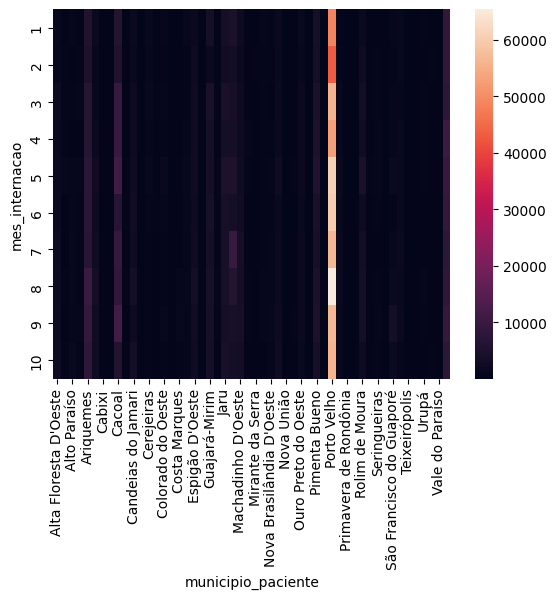

In [8]:
# Cria visualização

sns.heatmap(df_sus_sumarizado)

plt.show()

## Customização

### Título

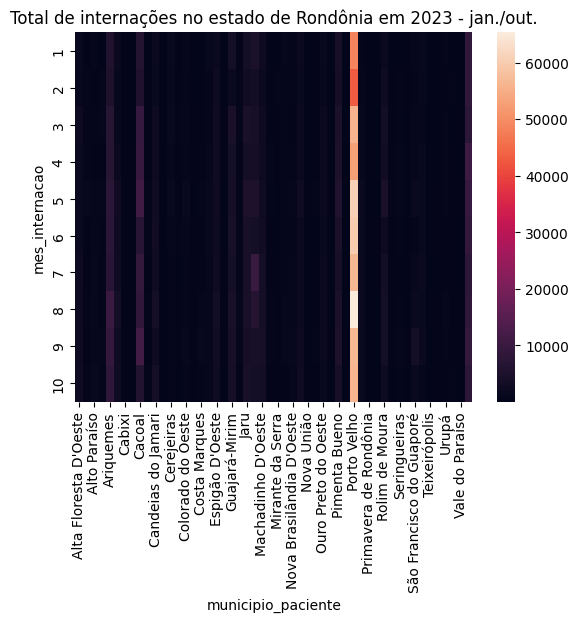

In [9]:
sns.heatmap(df_sus_sumarizado)

plt.title('Total de internações no estado de Rondônia em 2023 - jan./out.')

plt.show()

### Cor

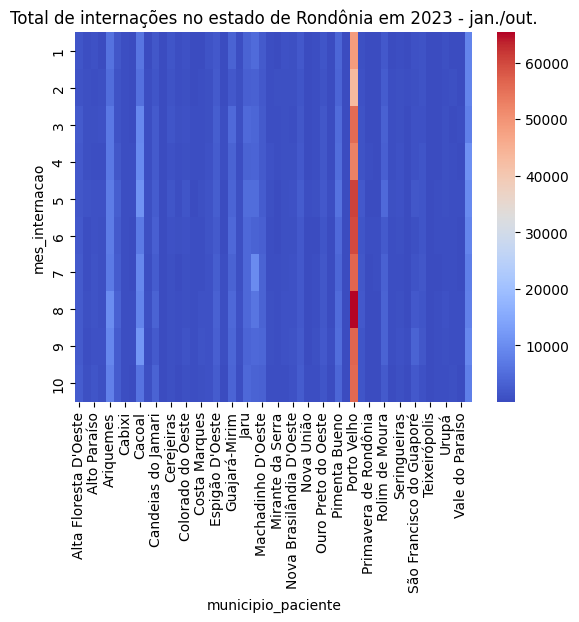

In [10]:
sns.heatmap(df_sus_sumarizado,
            cmap='coolwarm')

plt.title('Total de internações no estado de Rondônia em 2023 - jan./out.')

plt.show()

### Tamanho do gráfico

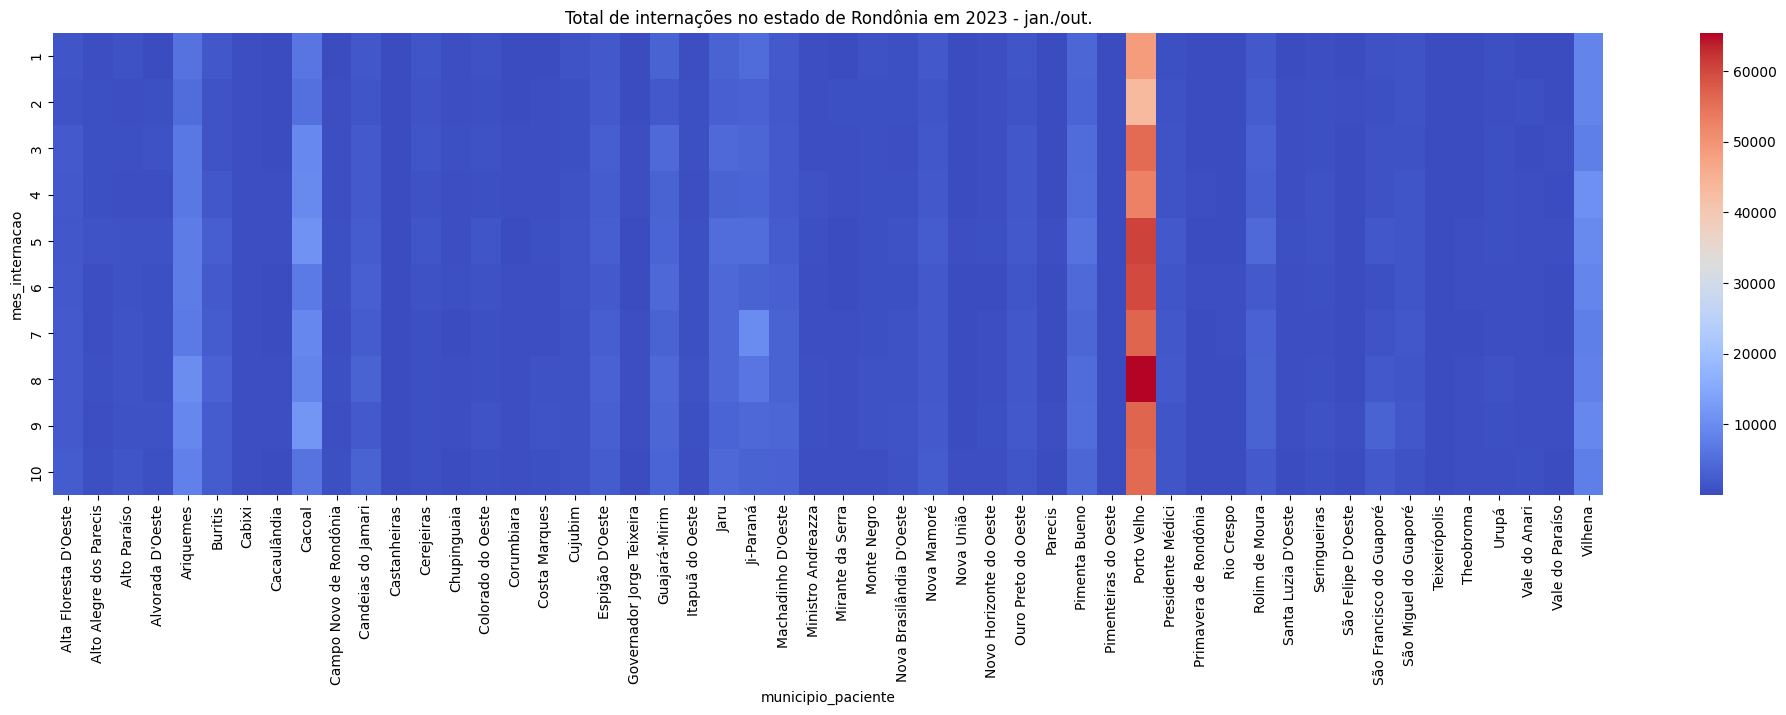

In [11]:
plt.figure(figsize=(25,6))

sns.heatmap(df_sus_sumarizado,
            cmap='coolwarm')

plt.title('Total de internações no estado de Rondônia em 2023 - jan./out.')

plt.show()

### Fonte

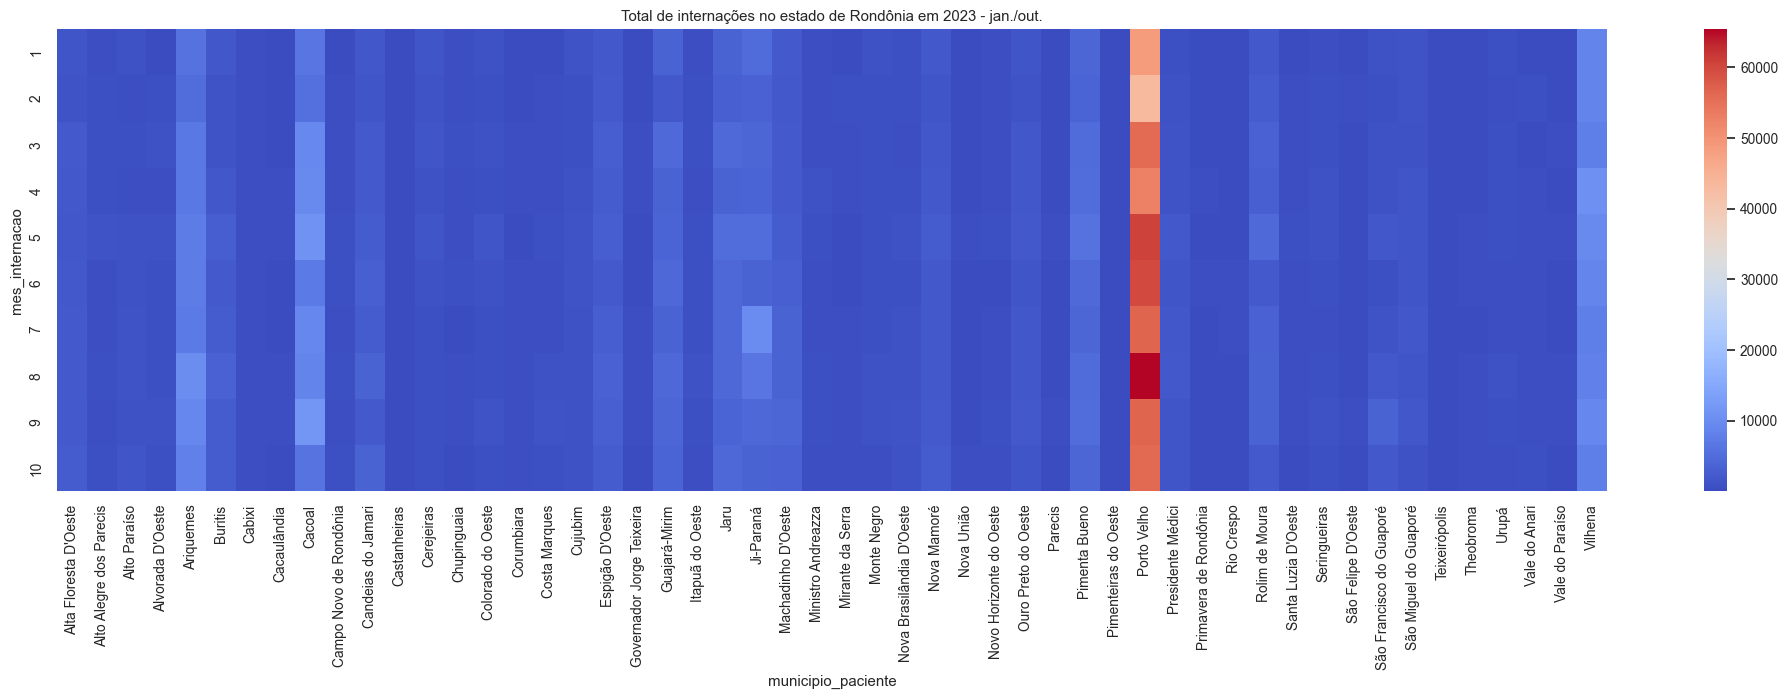

In [12]:
plt.figure(figsize=(25,6))
sns.set(font_scale=0.9)

sns.heatmap(df_sus_sumarizado,
            cmap='coolwarm')

plt.title('Total de internações no estado de Rondônia em 2023 - jan./out.')

plt.show()

### Grades

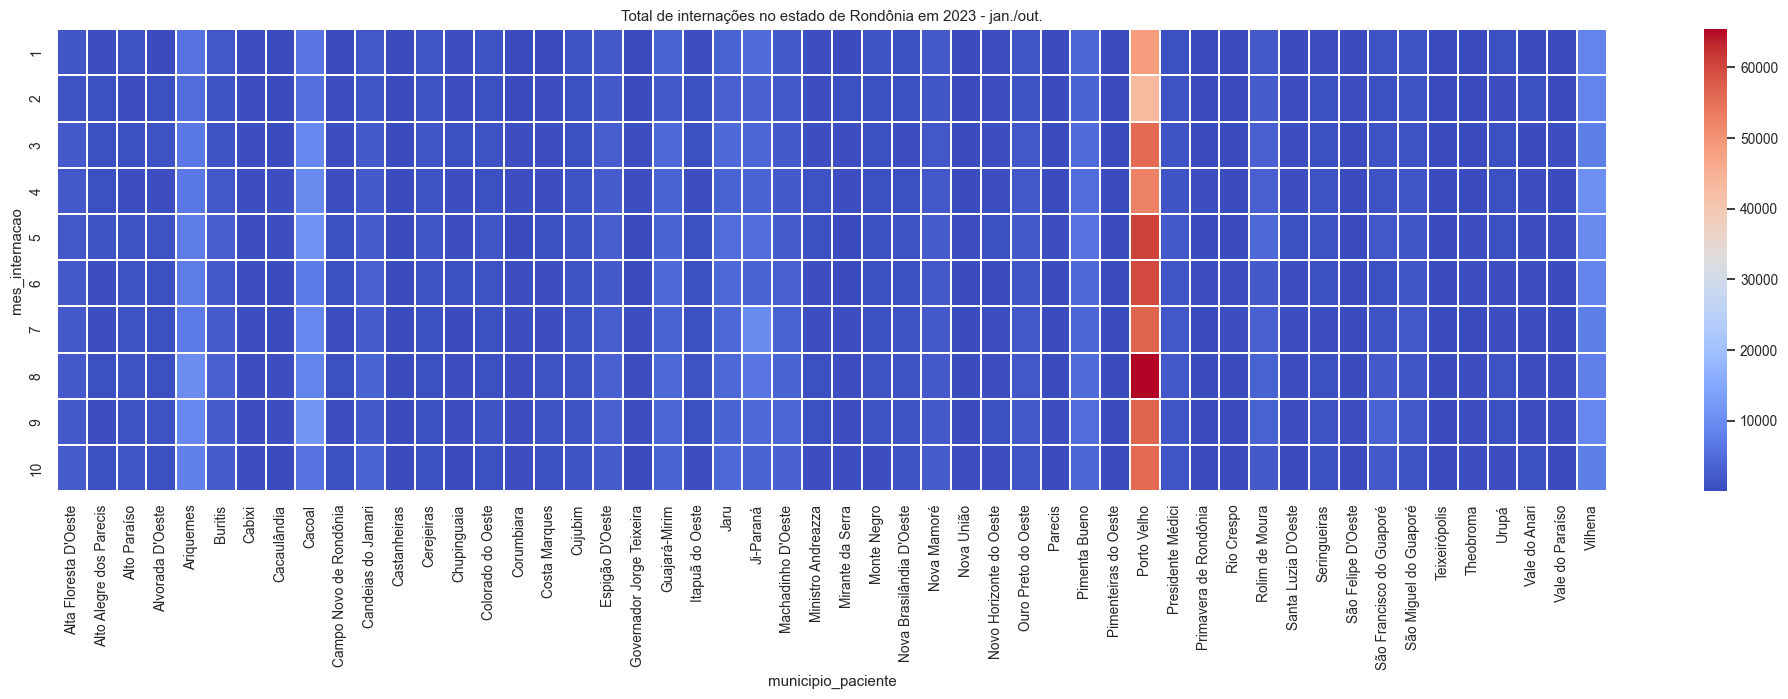

In [13]:
plt.figure(figsize=(25,6))
sns.set(font_scale=0.9)

sns.heatmap(df_sus_sumarizado,
            cmap='coolwarm',
            linewidth=0.2)

plt.title('Total de internações no estado de Rondônia em 2023 - jan./out.')

plt.show()

## Visualização de correlação entre variáveis

In [14]:
df_sus_bruto.head()

,Unnamed: 0,sigla_uf,mes_internacao,id_municipio_paciente,municipio_paciente,custo_tratamento
0,0,RO,5,110009,Espigão D'Oeste,306434
1,1,RO,5,110009,Espigão D'Oeste,346966
2,2,RO,5,110009,Espigão D'Oeste,32081
3,3,RO,5,110009,Espigão D'Oeste,184849
4,4,RO,5,110014,Nova Brasilândia D'Oeste,386534


In [15]:
df_sus_correlacao = df_sus_bruto[['mes_internacao', 'id_municipio_paciente', 'custo_tratamento']]

In [16]:
matrix_correlacao = df_sus_correlacao.corr()

In [17]:
matrix_correlacao

,mes_internacao,id_municipio_paciente,custo_tratamento
mes_internacao,1.000000,0.011209,0.000623
id_municipio_paciente,0.011209,1.000000,0.001516
custo_tratamento,0.000623,0.001516,1.000000


<Axes: >

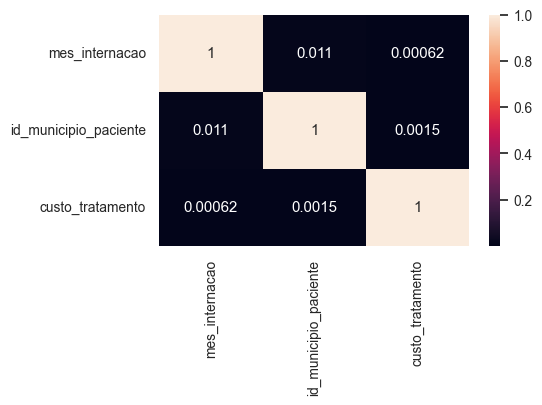

In [18]:
plt.figure(figsize=(5,3))

sns.heatmap(matrix_correlacao,
            cmap='rocket',
            annot=True) # Insere anotação